### Math of Intelligence : Vectors

In this week's coding challenge we will focus on the usage of vectors while solving different machine learning problems.
Vectors are used for:
1. A way of encoding our data, whether it's images,text,signal processing data,audio etc. For each kind of data we encode it into a set of vectors using some feature space.
2. A way to describe our model, our final trained ML model is simply a set of weights and biases which are simply vectors that were learned during some optimization process.

A common term for vectors (of all dimensions) that is used in the data science community is **tensors**, you can see this when you work with major ML libraries like **tensor**flow or pytorch that they refer to each vectorized data as a tensor of some rank (rank = vector's dimension).

In this notebook I will pass through a dataset that provides several metrics of facebook posts in order to find the amount of total interactions resulting from this post (this dataset is small on purpose, the real target here is to show the high usage of vectorized data in the learning process,not the dataset).

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from six import with_metaclass
%matplotlib notebook

In [27]:
#Let's look at our dataset.
df = pd.read_csv('train.csv',sep=',')
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


By looking at these features we can see that several of these features are **categorical**, because I want to simplify the problem as much as possible and focus on the regularization we will leave out all the categorical features (if we really were trying to attack this problem,we could use embedding vectors for these categorical features).

In [28]:
# #Remove all categorical features.
# df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10,11]],axis=1,inplace=True)
# #Drop all rows that contain NaNs
# df.dropna(axis=0,how='any',inplace=True)
df.head(50)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


Now that we are left with the categorical features let's get straight to the code.

In [29]:
train = df.as_matrix()
train.shape

train = train[~np.isnan(train).any(axis=1)]
train.shape
#train = train[:50,:]

(699, 2)

In [30]:
# #Dimensionality reduction.
# pca = PCA(n_components=2)
# reduced_data = pca.fit(np_data.T).components_.T
# reduced_data.shape

<IPython.core.display.Javascript object>


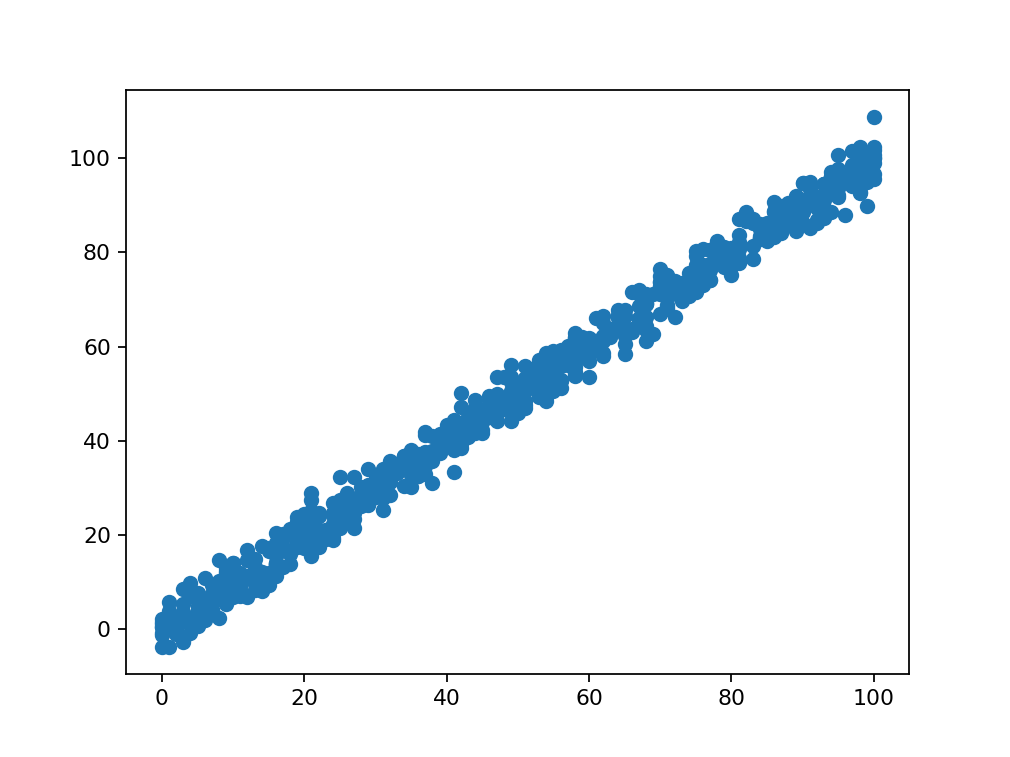

In [31]:
plt.figure()
plt.scatter(train[:,0],train[:,1])

Because this notebook is focused on the use of **regularizations** I will not explain much about the training process (there is a great explanation about SGD in the youtube series by siraj).
We will use the MSE loss function (this is a standard for simple linear regression problems):
$$ loss(y') = \frac {1}{N}\sum_{i=1} ^ {N} (y_i - y'_i)^2 $$

The equation aboves means that on a given batch of N training examples the loss will be computed by passing through each training example,take it's prediction $y'_i$ and the real label $y_i$ compute the squared error and then compute the mean of all of those errors.

In [43]:
#Save number of training examples.
N = train.shape[0]

X_train = train[:,0]
Y_train = train[:,1]

def predict(x,w,b):
    return w * x + b

def compute_grads(x,y,w,b):
    # Save the number of samples for x and y.
    num_samples = x.shape[0]
    res = w * x + b - y
    grads = np.zeros(2)
    
    #Compute analytical gradients.
    grads[0] =  np.sum(x * res)
    grads[1] =  np.sum(res)
    return (2 / num_samples) * grads

def grad_step(w,b,lr = 1e-2,epochs = 10,reg = 0.1,reg_func = lambda x,y:[0,0],reg_grad = lambda x:0):
        '''
        Implementation of the most basic gradient descent step.
        For each epoch we will step over
        Parameters:
            -w : The weight that will be used for our 2d linear regression model.
            -b : Bias.
            lr : The learning rate.
            epochs: Number of times that we will pass over the training data.
            reg: regularization hyperparameter(lambda)
            reg_func: The used regularization function (will be implemented later).
        '''
        for j in range(epochs):
            reg_val,reg_grad = reg_func(reg,[w,b])
            grads = compute_grads(X_train,Y_train,w,b)
            grads += reg_grad
            #Compute the current loss.
            loss = (1 / N) * np.sum(np.power(predict(X_train,w,b) - Y_train,2)) + reg_val
            
            #Update the weights.
            w -= grads[0] * lr
            b -= grads[1] * lr
        return w,b

w = b = 1.0
w,b = grad_step(w,b,lr=1e-6,epochs=10)
    

<IPython.core.display.Javascript object>


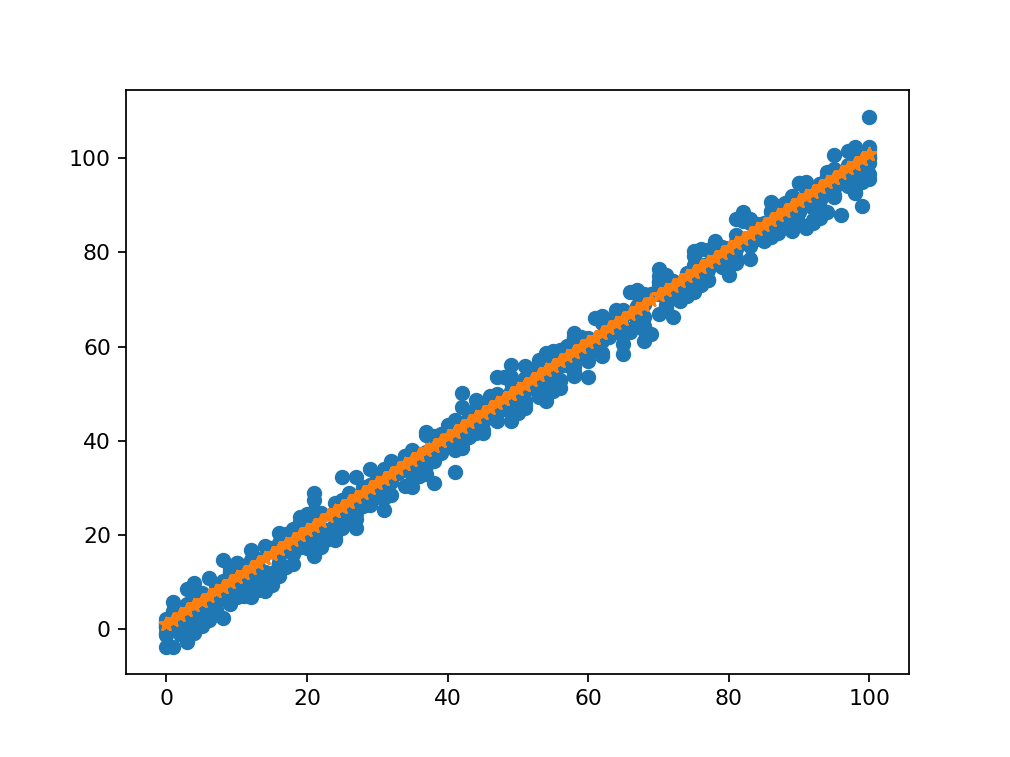

In [44]:
plt.figure()
plt.scatter(train[:,0],train[:,1])
plt.scatter(X_train,predict(X_train,w,b),marker='*')

### Reguralization

So what is regularization and why do we need it.
While training our model on some specific training data we want our final model to **generalize** well and succeed in predicting results for data that it hasn't seen before in training.
The case where our model doesn't generalize well and only fits the training data is called **overfitting**.
Example:
![title](Overfitted_Data.png)

In the example above we can see that our model learned the training data so well that it uses a polynomial as his prediction so that each point in our training data is predicted correctly.On the other hand the linear function displayed will generalize better for future data that our model will face in the future.

In order to prevent a case of overfitting we will add a **regularization term** to our loss function. The idea of the regularization term is to add a function that will limit the way that our weights are updated.
We will be able to control our weights updates by using the regularization hyperparameter $\lambda$, we will change our loss function (in our case MSE) to be the following:
$$MSE-REG(y_i,y'_i,W) = MSE(y_i,y'_i) + \lambda * Reg(W) $$

MSE-REG = Mean squared error using a regularization term.

MSE = The normal mean squared error loss function.

Reg = The regularization term that we will use.

Usually the regularization parameter will have a pretty small value (because in cases where our value is very high this will result in very high loss and the weights will be zeroed).

There are two main regularization terms that are used for regression and classification tasks: L1 and L2 regressions.

#### L1 Regularization

The L1 regularization is one of the simplest regularization terms that we have out there.
$$ L1(W) = \sum_{i=1}^{n}|W_i| $$

This regularization function simply sums the absolute values of all of our weights. Using the regularization hyperparameter we can control the way that our weights change.

#### L2 regularization
The L2 regularization is the more popular one, in this case we simply sum the **squares** of all the weights.

$$ L2(W) = \sum_{i=1}^{n}W_i ^ 2$$

Comparison between L1 and L2:
![title](L1vsL2.png)

- High value of $\lambda$: The weights can't have very high values because it will resolve in very limited range for our weights value.
- Small value of $\lambda$: The weights can have a wide range of values but we can control it by fine tuning the $\lambda$ hyperparameter.

Now let's implement both of them:

In [76]:
def l1_reg(lam,weights):
    return lam * np.sum(np.abs(weights)),np.ones(len(weights)) * lam

def l2_reg(lam,weights):
    '''
    Return regularization value and it's gradient (just because it's way simpler).
    '''
    return lam * np.sum(np.square(weights)),2 * np.array(weights) * lam

w = b = 1.0
w,b = grad_step(w,b,lr=1e-6,epochs=10,reg=1,reg_func=l2_reg)


<IPython.core.display.Javascript object>


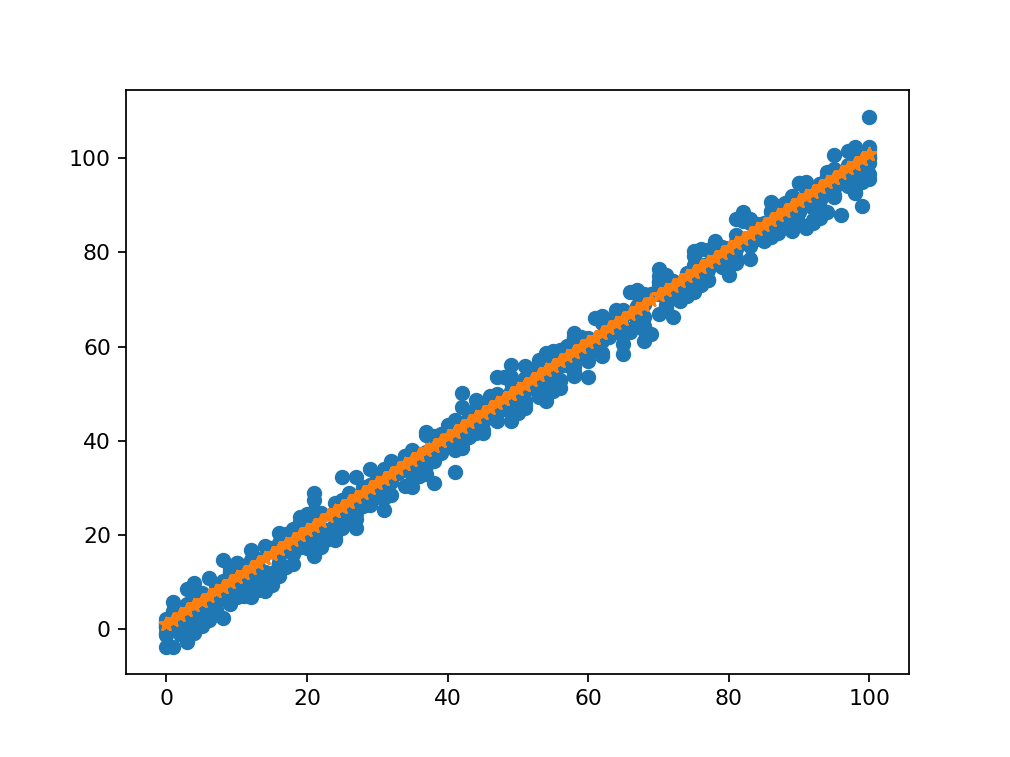

In [77]:
plt.figure()
plt.scatter(train[:,0],train[:,1])
plt.scatter(X_train,predict(X_train,w,b),marker='*')